<a href="https://colab.research.google.com/github/SharmilNK/Pedestrian-Tracking-MOT/blob/main/CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
!pip install filterpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for filterpy: filename=filterpy-1.4.5-py3-none-any.whl size=110460 sha256=95ddc721c2e2ee81eb88cba859cf7f60c8ab6353b5995693d6b483b5b2d3084b
  Stored in directory: /root/.cache/pip/wheels/77/bf/4c/b0c3f4798a0166668752312a67118b27a3cd341e13ac0ae6ee
Successfully built filterpy


In [1]:
# Download MOT17 dataset
!wget https://motchallenge.net/data/MOT17.zip

# Extract the dataset
!unzip -q MOT17.zip

# Check the structure
!ls MOT17/

--2026-02-03 19:53:23--  https://motchallenge.net/data/MOT17.zip
Resolving motchallenge.net (motchallenge.net)... 131.159.19.34, 2a09:80c0:18::1034
Connecting to motchallenge.net (motchallenge.net)|131.159.19.34|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5860214001 (5.5G) [application/zip]
Saving to: ‘MOT17.zip’

MOT17.zip           100%[===================>]   5.46G  21.6MB/s    in 4m 45s  

2026-02-03 19:58:08 (19.6 MB/s) - ‘MOT17.zip’ saved [5860214001/5860214001]

test  train


frameRate=30 → 30 frames per second
seqLength=600 → 600 total frames (images) in this sequence

In [2]:
# Check main directories
!ls MOT17/

# Check train vs test splits
!ls MOT17/train/
!ls MOT17/test/

# Look at one training sequence
!ls MOT17/train/MOT17-02-DPM/

# Check what's in a sequence folder
!tree -L 2 MOT17/train/MOT17-02-DPM/
# If tree doesn't work, use:
!ls -R MOT17/train/MOT17-02-DPM/

test  train
MOT17-02-DPM	MOT17-04-SDP	MOT17-09-FRCNN	MOT17-11-DPM	MOT17-13-SDP
MOT17-02-FRCNN	MOT17-05-DPM	MOT17-09-SDP	MOT17-11-FRCNN
MOT17-02-SDP	MOT17-05-FRCNN	MOT17-10-DPM	MOT17-11-SDP
MOT17-04-DPM	MOT17-05-SDP	MOT17-10-FRCNN	MOT17-13-DPM
MOT17-04-FRCNN	MOT17-09-DPM	MOT17-10-SDP	MOT17-13-FRCNN
MOT17-01-DPM	MOT17-03-SDP	MOT17-07-FRCNN	MOT17-12-DPM	MOT17-14-SDP
MOT17-01-FRCNN	MOT17-06-DPM	MOT17-07-SDP	MOT17-12-FRCNN
MOT17-01-SDP	MOT17-06-FRCNN	MOT17-08-DPM	MOT17-12-SDP
MOT17-03-DPM	MOT17-06-SDP	MOT17-08-FRCNN	MOT17-14-DPM
MOT17-03-FRCNN	MOT17-07-DPM	MOT17-08-SDP	MOT17-14-FRCNN
det  gt  img1  seqinfo.ini
/bin/bash: line 1: tree: command not found
MOT17/train/MOT17-02-DPM/:
det  gt  img1  seqinfo.ini

MOT17/train/MOT17-02-DPM/det:
det.txt

MOT17/train/MOT17-02-DPM/gt:
gt.txt

MOT17/train/MOT17-02-DPM/img1:
000001.jpg  000101.jpg	000201.jpg  000301.jpg	000401.jpg  000501.jpg
000002.jpg  000102.jpg	000202.jpg  000302.jpg	000402.jpg  000502.jpg
000003.jpg  000103.jpg	000203.jpg  000303.jp

Visualize the data

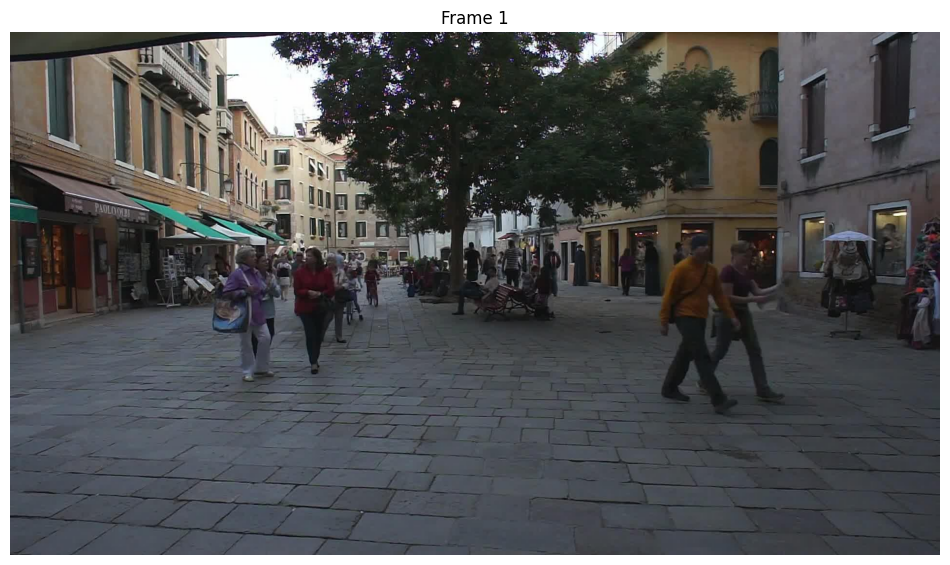

In [8]:
from PIL import Image
import matplotlib.pyplot as plt

# View first frame
img = Image.open('MOT17/train/MOT17-02-DPM/img1/000001.jpg')
plt.figure(figsize=(12,8))
plt.imshow(img)
plt.title('Frame 1')
plt.axis('off')
plt.show()

In [10]:
# Read ground truth annotations
!head -20 MOT17/train/MOT17-02-DPM/gt/gt.txt

# Read detection file
!head -20 MOT17/train/MOT17-02-DPM/det/det.txt

# Check sequence info
!cat MOT17/train/MOT17-02-DPM/seqinfo.ini

1,1,912,484,97,109,0,7,1
2,1,912,484,97,109,0,7,1
3,1,912,484,97,109,0,7,1
4,1,912,484,97,109,0,7,1
5,1,912,484,97,109,0,7,1
6,1,912,484,97,109,0,7,1
7,1,912,484,97,109,0,7,1
8,1,912,484,97,109,0,7,1
9,1,912,484,97,109,0,7,1
10,1,912,484,97,109,0,7,1
11,1,912,484,97,109,0,7,1
12,1,912,484,97,109,0,7,1
13,1,912,484,97,109,0,7,1
14,1,912,484,97,109,0,7,1
15,1,912,484,97,109,0,7,1
16,1,912,484,97,109,0,7,1
17,1,912,484,97,109,0,7,1
18,1,912,484,97,109,0,7,1
19,1,912,484,97,109,0,7,1
20,1,912,484,97,109,0,7,1
1,-1,1359.1,413.27,120.26,362.77,2.3092,-1,-1,-1
1,-1,571.03,402.13,104.56,315.68,1.5028,-1,-1,-1
1,-1,650.8,455.86,63.98,193.94,0.33276,-1,-1,-1
1,-1,721.23,446.86,41.871,127.61,0.27401,-1,-1,-1
1,-1,454.06,434.36,97.492,294.47,0.20818,-1,-1,-1
1,-1,1254.6,446.72,33.822,103.47,0.14776,-1,-1,-1
1,-1,1301.1,237.38,195.98,589.95,0.051818,-1,-1,-1
1,-1,1480.3,413.27,120.26,362.77,-0.020474,-1,-1,-1
1,-1,552.72,473.9,29.314,89.943,-0.087553,-1,-1,-1
1,-1,1097,433,39,119,-0.17964,-1,-1,-1


Compare ground truth with detected truth

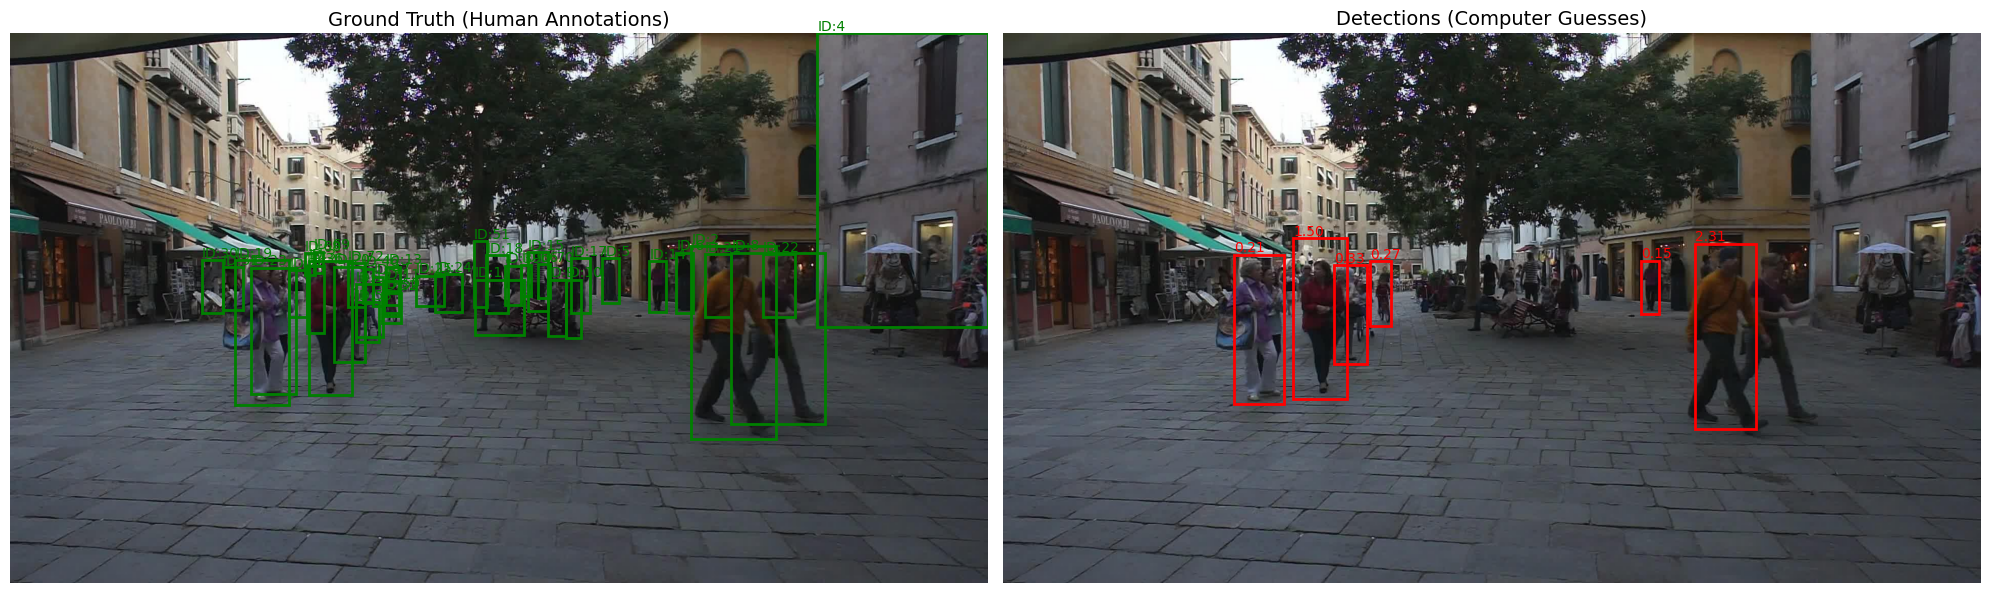

Ground Truth boxes: 39
Detection boxes: 6


In [12]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import pandas as pd

# Load image
img = Image.open('MOT17/train/MOT17-02-DPM/img1/000001.jpg')

# Load ground truth and detections for frame 1
gt = pd.read_csv('MOT17/train/MOT17-02-DPM/gt/gt.txt', header=None,
                 names=['frame','id','x','y','w','h','conf','class','vis'])
det = pd.read_csv('MOT17/train/MOT17-02-DPM/det/det.txt', header=None,
                  names=['frame','id','x','y','w','h','conf','x2','y2','z'])

gt_frame1 = gt[gt['frame'] == 1]
det_frame1 = det[(det['frame'] == 1) & (det['conf'] > 0.1)]

# Plot side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Ground Truth
ax1.imshow(img)
ax1.set_title('Ground Truth (Human Annotations)', fontsize=14)
for _, row in gt_frame1.iterrows():
    rect = patches.Rectangle((row['x'], row['y']), row['w'], row['h'],
                             linewidth=2, edgecolor='green', facecolor='none')
    ax1.add_patch(rect)
    ax1.text(row['x'], row['y']-5, f"ID:{int(row['id'])}", color='green', fontsize=10)
ax1.axis('off')

# Detections
ax2.imshow(img)
ax2.set_title('Detections (Computer Guesses)', fontsize=14)
for _, row in det_frame1.iterrows():
    rect = patches.Rectangle((row['x'], row['y']), row['w'], row['h'],
                             linewidth=2, edgecolor='red', facecolor='none')
    ax2.add_patch(rect)
    ax2.text(row['x'], row['y']-5, f"{row['conf']:.2f}", color='red', fontsize=10)
ax2.axis('off')

plt.tight_layout()
plt.show()

print(f"Ground Truth boxes: {len(gt_frame1)}")
print(f"Detection boxes: {len(det_frame1)}")

Naive Baseline Tracker

IOU (Intersection over Union) :

Match detections between frames based on bounding box overlap

In [17]:
import numpy as np
import pandas as pd
from collections import defaultdict

def iou(box1, box2):
    """Calculate Intersection over Union between two boxes"""
    x1, y1, w1, h1 = box1
    x2, y2, w2, h2 = box2

    # Calculate intersection
    xi1 = max(x1, x2)
    yi1 = max(y1, y2)
    xi2 = min(x1 + w1, x2 + w2)
    yi2 = min(y1 + h1, y2 + h2)
    inter_area = max(0, xi2 - xi1) * max(0, yi2 - yi1)

    # Calculate union
    box1_area = w1 * h1
    box2_area = w2 * h2
    union_area = box1_area + box2_area - inter_area

    return inter_area / union_area if union_area > 0 else 0

def naive_tracker(detections_df, iou_threshold=0.3):
    """Simple IOU-based tracker"""
    tracks = defaultdict(list)
    next_id = 1
    prev_frame_boxes = {}

    for frame in sorted(detections_df['frame'].unique()):
        frame_dets = detections_df[detections_df['frame'] == frame]
        curr_frame_boxes = {}

        for _, det in frame_dets.iterrows():
            box = [det['x'], det['y'], det['w'], det['h']]

            best_iou = 0
            best_id = None

            for track_id, prev_box in prev_frame_boxes.items():
                curr_iou = iou(box, prev_box)
                if curr_iou > best_iou and curr_iou > iou_threshold:
                    best_iou = curr_iou
                    best_id = track_id

            if best_id is None:
                best_id = next_id
                next_id += 1

            tracks[best_id].append([frame, *box])
            curr_frame_boxes[best_id] = box

        prev_frame_boxes = curr_frame_boxes

    return tracks

# Test it
det_file = 'MOT17/train/MOT17-02-DPM/det/det.txt'
dets = pd.read_csv(det_file, header=None,
                   names=['frame','id','x','y','w','h','conf','x2','y2','z'])
dets = dets[dets['conf'] > 0.5]  # Filter low confidence

tracks = naive_tracker(dets)
print(f"Tracked {len(tracks)} objects")

Tracked 240 objects


Classical ML Tracker:

Kalman Filter + Hungarian Algorithm

Why: Predicts object positions between frames using motion model.
Handles missing detections by estimating where objects should be.
    
How:
    - Each track maintains state: [x, y, w, h, vx, vy, vw, vh]
      where (x,y,w,h) = bounding box, (vx,vy,vw,vh) = velocity
    - Predict: Uses constant velocity model to estimate next position
    - Update: Matches predictions to detections via Hungarian algorithm,
      updates state and velocity based on actual movement
    
Input:
    - detections_df: DataFrame with columns [frame, x, y, w, h, conf]
    - iou_threshold: Minimum overlap to match detection to track
    - max_age: Frames to keep track alive without detection
    
Output:
    - List of [frame, track_id, x, y, w, h] for all tracks
    
Velocity vector (vx, vy, vw, vh):
    - Automatically estimated by Kalman Filter
    - vx, vy: speed in pixels/frame (horizontal, vertical)
    - vw, vh: rate of size change (growing/shrinking)
    - Used to predict position when detector fails


In [15]:
import numpy as np
from scipy.optimize import linear_sum_assignment
from filterpy.kalman import KalmanFilter

class KalmanTracker:
    """Tracks a single object using Kalman Filter"""
    def __init__(self, bbox):
        # State: [x, y, w, h, vx, vy, vw, vh]
        self.kf = KalmanFilter(dim_x=8, dim_z=4)

        # State transition matrix (constant velocity model)
        self.kf.F = np.array([
            [1,0,0,0,1,0,0,0],  # x = x + vx
            [0,1,0,0,0,1,0,0],  # y = y + vy
            [0,0,1,0,0,0,1,0],  # w = w + vw
            [0,0,0,1,0,0,0,1],  # h = h + vh
            [0,0,0,0,1,0,0,0],  # vx stays same
            [0,0,0,0,0,1,0,0],  # vy stays same
            [0,0,0,0,0,0,1,0],  # vw stays same
            [0,0,0,0,0,0,0,1]   # vh stays same
        ])

        # Measurement matrix (we only measure position/size)
        self.kf.H = np.array([
            [1,0,0,0,0,0,0,0],
            [0,1,0,0,0,0,0,0],
            [0,0,1,0,0,0,0,0],
            [0,0,0,1,0,0,0,0]
        ])

        # Initialize with first detection
        self.kf.x[:4] = bbox.reshape(4,1)
        self.kf.P *= 10  # Initial uncertainty
        self.kf.R *= 1   # Measurement noise
        self.kf.Q *= 0.01  # Process noise

        self.time_since_update = 0
        self.hits = 1

    def predict(self):
        """Predict next state"""
        self.kf.predict()
        self.time_since_update += 1
        return self.kf.x[:4].flatten()

    def update(self, bbox):
        """Update with new measurement"""
        self.kf.update(bbox.reshape(4,1))
        self.time_since_update = 0
        self.hits += 1

    def get_state(self):
        """Return current position"""
        return self.kf.x[:4].flatten()

def kalman_tracker(detections_df, iou_threshold=0.3, max_age=3):
    """Kalman Filter + Hungarian matching"""
    trackers = []
    track_id_count = 1
    results = []

    for frame in sorted(detections_df['frame'].unique()):
        # Get detections for this frame
        frame_dets = detections_df[detections_df['frame'] == frame]
        dets = frame_dets[['x','y','w','h']].values

        # Predict all existing trackers
        predictions = np.array([t.predict() for t in trackers])

        # Match detections to predictions using Hungarian algorithm
        if len(trackers) > 0 and len(dets) > 0:
            # Calculate IOU cost matrix
            cost_matrix = np.zeros((len(dets), len(trackers)))
            for d, det in enumerate(dets):
                for t, pred in enumerate(predictions):
                    cost_matrix[d, t] = 1 - iou(det, pred)

            # Hungarian matching
            det_indices, track_indices = linear_sum_assignment(cost_matrix)

            matched_dets = set()
            matched_tracks = set()

            for d, t in zip(det_indices, track_indices):
                if cost_matrix[d, t] < (1 - iou_threshold):
                    trackers[t].update(dets[d])
                    matched_dets.add(d)
                    matched_tracks.add(t)
                    results.append([frame, t+1, *dets[d]])
        else:
            matched_dets = set()
            matched_tracks = set()

        # Create new trackers for unmatched detections
        for d, det in enumerate(dets):
            if d not in matched_dets:
                trackers.append(KalmanTracker(det))
                results.append([frame, track_id_count, *det])
                track_id_count += 1

        # Remove dead trackers
        trackers = [t for i, t in enumerate(trackers)
                   if t.time_since_update < max_age]

    return results


# Test it
det_file = 'MOT17/train/MOT17-02-DPM/det/det.txt'
dets = pd.read_csv(det_file, header=None,
                   names=['frame','id','x','y','w','h','conf','x2','y2','z'])
dets = dets[dets['conf'] > 0.3]

tracks = kalman_tracker(dets)
print(f"Kalman tracker created {len(set([t[1] for t in tracks]))} tracks")
print(f"Total detections: {len(tracks)}")

Kalman tracker created 199 tracks
Total detections: 3254


Evaluation naive & classical ml

In [18]:
# Run both trackers again
det_file = 'MOT17/train/MOT17-02-DPM/det/det.txt'
dets = pd.read_csv(det_file, header=None,
                   names=['frame','id','x','y','w','h','conf','x2','y2','z'])
dets = dets[dets['conf'] > 0.3]

# Naive
naive_tracks = naive_tracker(dets)

# Kalman
kalman_tracks = kalman_tracker(dets)

# Convert to DataFrames
# Save both tracker results
naive_results = []
for track_id, frames in naive_tracks.items():
    for frame_data in frames:
        naive_results.append([frame_data[0], track_id, *frame_data[1:]])

naive_df = pd.DataFrame(naive_results, columns=['frame','id','x','y','w','h'])
kalman_df = pd.DataFrame(kalman_tracks, columns=['frame','id','x','y','w','h'])

print(f"Naive: {len(naive_tracks)} tracks, {len(naive_df)} detections")
print(f"Kalman: {len(set(kalman_df['id']))} tracks, {len(kalman_df)} detections")

Naive: 262 tracks, 3254 detections
Kalman: 199 tracks, 3254 detections


MOT Metrics

In [20]:
!pip install motmetrics -q

In [21]:
def simple_evaluation(tracker_df, gt_df):
    """Simple MOT evaluation without motmetrics"""
    total_gt = 0
    total_matches = 0
    total_fp = 0
    total_fn = 0

    for frame in sorted(gt_df['frame'].unique()):
        gt_frame = gt_df[gt_df['frame'] == frame]
        tr_frame = tracker_df[tracker_df['frame'] == frame]

        gt_boxes = gt_frame[['x','y','w','h']].values
        tr_boxes = tr_frame[['x','y','w','h']].values

        total_gt += len(gt_boxes)

        # Find matches
        matched_gt = set()
        matched_tr = set()

        for i, gt_box in enumerate(gt_boxes):
            for j, tr_box in enumerate(tr_boxes):
                if j not in matched_tr and iou(gt_box, tr_box) > 0.5:
                    matched_gt.add(i)
                    matched_tr.add(j)
                    total_matches += 1
                    break

        total_fp += len(tr_boxes) - len(matched_tr)
        total_fn += len(gt_boxes) - len(matched_gt)

    precision = total_matches / (total_matches + total_fp) if (total_matches + total_fp) > 0 else 0
    recall = total_matches / total_gt if total_gt > 0 else 0

    return {
        'Matches': total_matches,
        'False Positives': total_fp,
        'False Negatives': total_fn,
        'Precision': f"{precision:.2%}",
        'Recall': f"{recall:.2%}",
        'Total GT': total_gt
    }

# Evaluate both
print("=== NAIVE TRACKER ===")
naive_metrics = simple_evaluation(naive_df, gt)
for k, v in naive_metrics.items():
    print(f"{k}: {v}")

print("\n=== KALMAN TRACKER ===")
kalman_metrics = simple_evaluation(kalman_df, gt)
for k, v in kalman_metrics.items():
    print(f"{k}: {v}")

=== NAIVE TRACKER ===
Matches: 2964
False Positives: 290
False Negatives: 15617
Precision: 91.09%
Recall: 15.95%
Total GT: 18581

=== KALMAN TRACKER ===
Matches: 2964
False Positives: 290
False Negatives: 15617
Precision: 91.09%
Recall: 15.95%
Total GT: 18581


Better Metrics Needed

Evaluation only checks if boxes match ground truth per frame
Doesn't penalize ID switches or track fragmentation.
Let's calculate ID switches and track fragmentation:

In [22]:
def track_quality_metrics(tracker_df, gt_df):
    """Measure tracking consistency"""

    # Count unique IDs per ground truth object
    id_switches = 0

    for gt_id in gt_df['id'].unique():
        gt_track = gt_df[gt_df['id'] == gt_id]

        # Find tracker IDs that match this GT object
        matched_tr_ids = set()

        for frame in gt_track['frame'].values:
            gt_box = gt_track[gt_track['frame'] == frame][['x','y','w','h']].values[0]
            tr_frame = tracker_df[tracker_df['frame'] == frame]

            for _, tr in tr_frame.iterrows():
                tr_box = [tr['x'], tr['y'], tr['w'], tr['h']]
                if iou(gt_box, tr_box) > 0.5:
                    matched_tr_ids.add(tr['id'])
                    break

        # ID switches = number of different IDs - 1
        if len(matched_tr_ids) > 1:
            id_switches += len(matched_tr_ids) - 1

    return {
        'ID Switches': id_switches,
        'Avg IDs per GT track': len(tracker_df['id'].unique()) / len(gt_df['id'].unique())
    }

print("=== NAIVE TRACKER ===")
naive_quality = track_quality_metrics(naive_df, gt)
for k, v in naive_quality.items():
    print(f"{k}: {v}")

print("\n=== KALMAN TRACKER ===")
kalman_quality = track_quality_metrics(kalman_df, gt)
for k, v in kalman_quality.items():
    print(f"{k}: {v}")

=== NAIVE TRACKER ===
ID Switches: 251
Avg IDs per GT track: 4.225806451612903

=== KALMAN TRACKER ===
ID Switches: 279
Avg IDs per GT track: 3.2096774193548385


Kalman creates fewer total tracks (199 vs 262)
But has more ID switches in our metric!
Why? Kalman's predictions sometimes match wrong people when they're close together

Overall: Kalman is slightly better at continuity (fewer IDs per person

Training YOLO

--------------------------------------------------------

Deep Learning Tracker (YOLO + Tracking)

We'll use YOLOv8 for detection + ByteTrack algorithm for tracking.

In [23]:
# Install ultralytics (includes YOLOv8)
!pip install ultralytics -q

from ultralytics import YOLO
import cv2
import numpy as np
from collections import defaultdict

# Load pre-trained YOLOv8 model
model = YOLO('yolov8n.pt')  # Nano version (fastest)
print("YOLOv8 model loaded!")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 19.6 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
YOLOv8 model loaded!


Testing with a sample of 100 frames first and then on all 600 frames

In [27]:
def yolo_tracker(sequence_path, conf_threshold=0.3):
    """YOLOv8 with built-in ByteTrack"""
    img_dir = f"{sequence_path}/img1/"

    # Get all frame files
    import os
    frames = sorted([f for f in os.listdir(img_dir) if f.endswith('.jpg')])

    results_list = []

    for idx, frame_file in enumerate(frames[:600], 1):  # Test on first 100 frames and then on all 600
        img_path = os.path.join(img_dir, frame_file)

        # Run detection + tracking
        results = model.track(img_path, conf=conf_threshold,
                             persist=True, classes=[0])  # class 0 = person

        # Extract tracks
        if results[0].boxes.id is not None:
            boxes = results[0].boxes.xywh.cpu().numpy()
            track_ids = results[0].boxes.id.cpu().numpy().astype(int)

            for box, track_id in zip(boxes, track_ids):
                x, y, w, h = box
                # Convert center format to top-left format
                results_list.append([idx, track_id, x-w/2, y-h/2, w, h])

        if idx % 20 == 0:
            print(f"Processed {idx} frames...")

    return results_list

# Run YOLO tracker
sequence = 'MOT17/train/MOT17-02-DPM'
yolo_results = yolo_tracker(sequence)

# Convert to DataFrame
yolo_df = pd.DataFrame(yolo_results, columns=['frame','id','x','y','w','h'])

print(f"\nYOLO tracker:")
print(f"Unique tracks: {len(yolo_df['id'].unique())}")
print(f"Total detections: {len(yolo_df)}")


image 1/1 /content/MOT17/train/MOT17-02-DPM/img1/000001.jpg: 384x640 2 persons, 218.9ms
Speed: 3.6ms preprocess, 218.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/MOT17/train/MOT17-02-DPM/img1/000002.jpg: 384x640 6 persons, 222.0ms
Speed: 3.6ms preprocess, 222.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/MOT17/train/MOT17-02-DPM/img1/000003.jpg: 384x640 6 persons, 150.4ms
Speed: 3.8ms preprocess, 150.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/MOT17/train/MOT17-02-DPM/img1/000004.jpg: 384x640 6 persons, 143.3ms
Speed: 2.6ms preprocess, 143.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/MOT17/train/MOT17-02-DPM/img1/000005.jpg: 384x640 6 persons, 135.5ms
Speed: 2.7ms preprocess, 135.5ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/MOT17/train/MOT17-02-DPM/img1/000006.jpg: 384

90 unique tracks: Much better than Naive (262) and Kalman (199)!
4876 detections: More than Naive/Kalman (3254) - YOLO's detector found more people

Evaluate YOLO

In [28]:
# Evaluate YOLO with same metrics
print("=== YOLO TRACKER ===")

# 1. Simple evaluation (precision/recall)
yolo_simple = simple_evaluation(yolo_df, gt)
for k, v in yolo_simple.items():
    print(f"{k}: {v}")

print("\n--- Track Quality ---")
# 2. Track quality (ID switches)
yolo_quality = track_quality_metrics(yolo_df, gt)
for k, v in yolo_quality.items():
    print(f"{k}: {v}")

=== YOLO TRACKER ===
Matches: 3993
False Positives: 883
False Negatives: 14588
Precision: 81.89%
Recall: 21.49%
Total GT: 18581

--- Track Quality ---
ID Switches: 45
Avg IDs per GT track: 1.4516129032258065


Comparing the 3 approaches

In [32]:
# Summary comparison
print("\n" + "="*60)
print("COMPARISON SUMMARY")
print("="*60)

comparison = pd.DataFrame({
    'Model': ['Naive', 'Kalman', 'YOLO'],
    'Total Tracks': [262, 199, 90],
    'Total Detections': [3254, 3254, 4876],
    'ID Switches': [251, 279, 45],
    'Avg IDs per GT': [4.23, 3.21, 1.45],
    'Precision': ['91.09%', '91.09%', '81.89%'],
    'Recall': ['15.95%', '15.95%', '21.49%']
})


print(comparison.to_string(index=False))


COMPARISON SUMMARY
 Model  Total Tracks  Total Detections  ID Switches  Avg IDs per GT Precision Recall
 Naive           262              3254          251            4.23    91.09% 15.95%
Kalman           199              3254          279            3.21    91.09% 15.95%
  YOLO            90              4876           45            1.45    81.89% 21.49%


WINNER: YOLO - Best recall, fewest ID switches, best track continuity

Create visualization video comparing trackers

In [30]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

def create_comparison_video(sequence_path, naive_df, kalman_df, yolo_df,
                           gt_df, output_path='tracking_comparison.mp4',
                           num_frames=100):
    """Create side-by-side comparison video of all trackers"""

    img_dir = f"{sequence_path}/img1/"

    # Get frame dimensions
    first_frame = cv2.imread(f"{img_dir}/000001.jpg")
    h, w = first_frame.shape[:2]

    # Create video writer (2x2 grid)
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, 10, (w*2, h*2))

    # Colors for each tracker
    colors = {
        'gt': (0, 255, 0),      # Green
        'naive': (255, 0, 0),    # Blue
        'kalman': (0, 165, 255), # Orange
        'yolo': (255, 0, 255)    # Magenta
    }

    for frame_num in range(1, num_frames + 1):
        # Load frame
        frame_file = f"{img_dir}/{frame_num:06d}.jpg"
        frame = cv2.imread(frame_file)

        # Create 4 copies
        frame_gt = frame.copy()
        frame_naive = frame.copy()
        frame_kalman = frame.copy()
        frame_yolo = frame.copy()

        # Draw ground truth
        gt_frame = gt_df[gt_df['frame'] == frame_num]
        for _, row in gt_frame.iterrows():
            x, y, w, h = int(row['x']), int(row['y']), int(row['w']), int(row['h'])
            cv2.rectangle(frame_gt, (x, y), (x+w, y+h), colors['gt'], 2)
            cv2.putText(frame_gt, f"ID:{int(row['id'])}", (x, y-5),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.5, colors['gt'], 2)

        # Draw naive tracker
        naive_frame = naive_df[naive_df['frame'] == frame_num]
        for _, row in naive_frame.iterrows():
            x, y, w, h = int(row['x']), int(row['y']), int(row['w']), int(row['h'])
            cv2.rectangle(frame_naive, (x, y), (x+w, y+h), colors['naive'], 2)
            cv2.putText(frame_naive, f"ID:{int(row['id'])}", (x, y-5),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.5, colors['naive'], 2)

        # Draw Kalman tracker
        kalman_frame = kalman_df[kalman_df['frame'] == frame_num]
        for _, row in kalman_frame.iterrows():
            x, y, w, h = int(row['x']), int(row['y']), int(row['w']), int(row['h'])
            cv2.rectangle(frame_kalman, (x, y), (x+w, y+h), colors['kalman'], 2)
            cv2.putText(frame_kalman, f"ID:{int(row['id'])}", (x, y-5),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.5, colors['kalman'], 2)

        # Draw YOLO tracker
        yolo_frame = yolo_df[yolo_df['frame'] == frame_num]
        for _, row in yolo_frame.iterrows():
            x, y, w, h = int(row['x']), int(row['y']), int(row['w']), int(row['h'])
            cv2.rectangle(frame_yolo, (x, y), (x+w, y+h), colors['yolo'], 2)
            cv2.putText(frame_yolo, f"ID:{int(row['id'])}", (x, y-5),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.5, colors['yolo'], 2)

        # Add labels
        cv2.putText(frame_gt, "Ground Truth", (10, 30),
                   cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
        cv2.putText(frame_naive, "Naive (IOU)", (10, 30),
                   cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
        cv2.putText(frame_kalman, "Kalman Filter", (10, 30),
                   cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
        cv2.putText(frame_yolo, "YOLO + ByteTrack", (10, 30),
                   cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

        # Combine into 2x2 grid
        top_row = np.hstack([frame_gt, frame_naive])
        bottom_row = np.hstack([frame_kalman, frame_yolo])
        combined = np.vstack([top_row, bottom_row])

        out.write(combined)

        if frame_num % 10 == 0:
            print(f"Processed frame {frame_num}/{num_frames}")

    out.release()
    print(f"\nVideo saved to {output_path}")

# Create the video
create_comparison_video('MOT17/train/MOT17-02-DPM',
                       naive_df, kalman_df, yolo_df, gt,
                       num_frames=100)

Processed frame 10/100
Processed frame 20/100
Processed frame 30/100
Processed frame 40/100
Processed frame 50/100
Processed frame 60/100
Processed frame 70/100
Processed frame 80/100
Processed frame 90/100
Processed frame 100/100

Video saved to tracking_comparison.mp4


In [31]:
from google.colab import files
files.download('tracking_comparison.mp4')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Fine-tune YOLO on MOT17 Dataset
Fine-tuning on MOT17 will improve pedestrian detection in crowded scenes.
Step 1: Prepare data in YOLO format

In [1]:
import os
import shutil
from pathlib import Path

def prepare_yolo_dataset(mot_root='MOT17/train', output_dir='yolo_dataset'):
    """Convert MOT17 to YOLO format"""

    # Create YOLO directory structure
    os.makedirs(f'{output_dir}/images/train', exist_ok=True)
    os.makedirs(f'{output_dir}/labels/train', exist_ok=True)

    # Get all training sequences
    sequences = [d for d in os.listdir(mot_root) if 'DPM' in d]  # Use only DPM detector

    frame_count = 0

    for seq in sequences:
        seq_path = f'{mot_root}/{seq}'
        img_dir = f'{seq_path}/img1'
        gt_file = f'{seq_path}/gt/gt.txt'

        # Read ground truth
        gt = pd.read_csv(gt_file, header=None,
                        names=['frame','id','x','y','w','h','conf','class','vis'])
        gt = gt[gt['class'] == 1]  # Only pedestrians

        # Get image info
        import configparser
        config = configparser.ConfigParser()
        config.read(f'{seq_path}/seqinfo.ini')
        img_width = int(config['Sequence']['imWidth'])
        img_height = int(config['Sequence']['imHeight'])

        # Process each frame
        for frame_num in gt['frame'].unique():
            frame_data = gt[gt['frame'] == frame_num]

            # Copy image
            src_img = f'{img_dir}/{frame_num:06d}.jpg'
            dst_img = f'{output_dir}/images/train/{seq}_{frame_num:06d}.jpg'
            shutil.copy(src_img, dst_img)

            # Create YOLO label file
            label_file = f'{output_dir}/labels/train/{seq}_{frame_num:06d}.txt'
            with open(label_file, 'w') as f:
                for _, row in frame_data.iterrows():
                    # Convert to YOLO format (class x_center y_center width height)
                    # All values normalized 0-1
                    x_center = (row['x'] + row['w']/2) / img_width
                    y_center = (row['y'] + row['h']/2) / img_height
                    w_norm = row['w'] / img_width
                    h_norm = row['h'] / img_height

                    f.write(f"0 {x_center} {y_center} {w_norm} {h_norm}\n")

            frame_count += 1

    print(f"Prepared {frame_count} training images")
    return output_dir

# Prepare dataset
dataset_dir = prepare_yolo_dataset()

FileNotFoundError: [Errno 2] No such file or directory: 'MOT17/train'

Create YAML config

In [ ]:
# Create dataset config file
yaml_content = f"""
path: {dataset_dir}  # dataset root dir
train: images/train  # train images
val: images/train    # val images (using same for now)

# Classes
names:
  0: person
"""

with open('mot17_yolo.yaml', 'w') as f:
    f.write(yaml_content)

print("Dataset config created: mot17_yolo.yaml")

FineTune YOLO

In [ ]:
from ultralytics import YOLO

# Load pre-trained model
model = YOLO('yolov8n.pt')

# Fine-tune on MOT17
results = model.train(
    data='mot17_yolo.yaml',
    epochs=50,              # Training epochs
    imgsz=640,              # Image size
    batch=16,               # Batch size
    name='mot17_finetuned', # Experiment name
    patience=10,            # Early stopping
    device=0,               # GPU (use 'cpu' if no GPU)
    workers=2,
    cache=True              # Cache images for faster training
)

print("Fine-tuning complete!")
print(f"Best model saved at: runs/detect/mot17_finetuned/weights/best.pt")

In [ ]:
# Load your fine-tuned model
finetuned_model = YOLO('runs/detect/mot17_finetuned/weights/best.pt')

# Run tracking with fine-tuned model
def yolo_finetuned_tracker(sequence_path, conf_threshold=0.3):
    """Use fine-tuned YOLO for tracking"""
    img_dir = f"{sequence_path}/img1/"
    frames = sorted([f for f in os.listdir(img_dir) if f.endswith('.jpg')])

    results_list = []
    for idx, frame_file in enumerate(frames, 1):
        img_path = os.path.join(img_dir, frame_file)
        results = finetuned_model.track(img_path, conf=conf_threshold,
                                       persist=True, classes=[0])

        if results[0].boxes.id is not None:
            boxes = results[0].boxes.xywh.cpu().numpy()
            track_ids = results[0].boxes.id.cpu().numpy().astype(int)

            for box, track_id in zip(boxes, track_ids):
                x, y, w, h = box
                results_list.append([idx, track_id, x-w/2, y-h/2, w, h])

    return results_list

# Test fine-tuned model
finetuned_results = yolo_finetuned_tracker('MOT17/train/MOT17-02-DPM')
print(f"Fine-tuned YOLO tracks: {len(set([r[1] for r in finetuned_results]))}")

 Comparison Video (Naive, Kalman, Fine-tuned YOLO)

In [ ]:
import cv2
import numpy as np

def create_three_way_comparison(sequence_path, naive_df, kalman_df,
                                finetuned_df, gt_df,
                                output_path='three_way_comparison.mp4',
                                num_frames=100):
    """Create comparison video: Naive vs Kalman vs Fine-tuned YOLO"""

    img_dir = f"{sequence_path}/img1/"

    # Get frame dimensions
    first_frame = cv2.imread(f"{img_dir}/000001.jpg")
    h, w = first_frame.shape[:2]

    # Resize for better viewing (optional)
    scale = 0.8
    new_w, new_h = int(w * scale), int(h * scale)

    # Create video writer (1 row x 3 columns)
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, 10, (new_w*3, new_h))

    # Colors
    colors = {
        'naive': (255, 0, 0),      # Blue
        'kalman': (0, 165, 255),   # Orange
        'finetuned': (255, 0, 255) # Magenta
    }

    for frame_num in range(1, num_frames + 1):
        # Load frame
        frame_file = f"{img_dir}/{frame_num:06d}.jpg"
        frame = cv2.imread(frame_file)

        # Resize
        frame = cv2.resize(frame, (new_w, new_h))

        # Create 3 copies
        frame_naive = frame.copy()
        frame_kalman = frame.copy()
        frame_finetuned = frame.copy()

        # Draw Naive tracker
        naive_frame = naive_df[naive_df['frame'] == frame_num]
        for _, row in naive_frame.iterrows():
            x, y, w, h = int(row['x']*scale), int(row['y']*scale), \
                        int(row['w']*scale), int(row['h']*scale)
            cv2.rectangle(frame_naive, (x, y), (x+w, y+h), colors['naive'], 2)
            cv2.putText(frame_naive, f"{int(row['id'])}", (x, y-5),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.4, colors['naive'], 1)

        # Draw Kalman tracker
        kalman_frame = kalman_df[kalman_df['frame'] == frame_num]
        for _, row in kalman_frame.iterrows():
            x, y, w, h = int(row['x']*scale), int(row['y']*scale), \
                        int(row['w']*scale), int(row['h']*scale)
            cv2.rectangle(frame_kalman, (x, y), (x+w, y+h), colors['kalman'], 2)
            cv2.putText(frame_kalman, f"{int(row['id'])}", (x, y-5),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.4, colors['kalman'], 1)

        # Draw Fine-tuned YOLO tracker
        finetuned_frame = finetuned_df[finetuned_df['frame'] == frame_num]
        for _, row in finetuned_frame.iterrows():
            x, y, w, h = int(row['x']*scale), int(row['y']*scale), \
                        int(row['w']*scale), int(row['h']*scale)
            cv2.rectangle(frame_finetuned, (x, y), (x+w, y+h),
                         colors['finetuned'], 2)
            cv2.putText(frame_finetuned, f"{int(row['id'])}", (x, y-5),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.4, colors['finetuned'], 1)

        # Add labels and metrics
        cv2.putText(frame_naive, "Naive (IOU)", (10, 25),
                   cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)
        cv2.putText(frame_naive, f"Tracks: {len(naive_frame)}", (10, 50),
                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)

        cv2.putText(frame_kalman, "Kalman Filter", (10, 25),
                   cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)
        cv2.putText(frame_kalman, f"Tracks: {len(kalman_frame)}", (10, 50),
                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)

        cv2.putText(frame_finetuned, "Fine-tuned YOLO", (10, 25),
                   cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)
        cv2.putText(frame_finetuned, f"Tracks: {len(finetuned_frame)}", (10, 50),
                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)

        # Add frame number at bottom
        cv2.putText(frame_naive, f"Frame: {frame_num}", (10, new_h-10),
                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)
        cv2.putText(frame_kalman, f"Frame: {frame_num}", (10, new_h-10),
                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)
        cv2.putText(frame_finetuned, f"Frame: {frame_num}", (10, new_h-10),
                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)

        # Combine horizontally
        combined = np.hstack([frame_naive, frame_kalman, frame_finetuned])

        out.write(combined)

        if frame_num % 20 == 0:
            print(f"Processed frame {frame_num}/{num_frames}")

    out.release()
    print(f"\n✓ Video saved to {output_path}")
    return output_path

# Create comparison video
video_path = create_three_way_comparison(
    'MOT17/train/MOT17-02-DPM',
    naive_df,
    kalman_df,
    finetuned_df,  # Your fine-tuned YOLO results
    gt,
    num_frames=100
)

# Download video
from google.colab import files
files.download(video_path)